### 라이브러리 불러오기 및 폰트 설정, 데이터 확인

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno
import matplotlib.font_manager as fm

In [2]:
fontpath = '/System/Library/Fonts/Supplemental/Arial Unicode.ttf'
font = fm.FontProperties(fname=fontpath).get_name()
plt.rc('font', family=font)
%config lnlineBackend.figure_format = 'retina'

In [3]:
csv_road = pd.read_csv('/Users/kimsanghun/Documents/프로젝트/data/도로교통공단_시군구별 월별 교통사고 통계_20211231.csv', encoding='cp949')
csv_road.head()

,시도,시군구,발생월,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,서울,종로구,1,69,3,21,66,6
1,서울,종로구,2,54,0,21,46,8
2,서울,종로구,3,66,0,17,65,10
3,서울,종로구,4,51,0,21,39,6
4,서울,종로구,5,62,0,12,68,11


In [4]:
road = csv_road.copy()
road.head()

,시도,시군구,발생월,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,서울,종로구,1,69,3,21,66,6
1,서울,종로구,2,54,0,21,46,8
2,서울,종로구,3,66,0,17,65,10
3,서울,종로구,4,51,0,21,39,6
4,서울,종로구,5,62,0,12,68,11


In [5]:
road.index 

RangeIndex(start=0, stop=2737, step=1)

In [6]:
road.columns

Index(['시도', '시군구', '발생월', '사고건수', '사망자수', '중상자수', '경상자수', '부상신고자수'], dtype='object')

In [7]:
road.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2737 entries, 0 to 2736
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도      2737 non-null   object
 1   시군구     2737 non-null   object
 2   발생월     2737 non-null   int64 
 3   사고건수    2737 non-null   int64 
 4   사망자수    2737 non-null   int64 
 5   중상자수    2737 non-null   int64 
 6   경상자수    2737 non-null   int64 
 7   부상신고자수  2737 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 171.2+ KB


In [8]:
road.dtypes

시도        object
시군구       object
발생월        int64
사고건수       int64
사망자수       int64
중상자수       int64
경상자수       int64
부상신고자수     int64
dtype: object

In [9]:
void_road = road.isnull().sum()
void_road

시도        0
시군구       0
발생월       0
사고건수      0
사망자수      0
중상자수      0
경상자수      0
부상신고자수    0
dtype: int64

In [10]:
road['시도'].unique()

array(['서울', '부산', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주',
       '대구', '인천', '광주', '대전', '울산', '세종'], dtype=object)

In [11]:
road['시도'].value_counts()

경기    372
서울    300
경북    269
전남    264
강원    216
경남    216
부산    192
충남    180
전북    167
충북    132
인천    117
대구     96
광주     60
대전     60
울산     60
제주     24
세종     12
Name: 시도, dtype: int64

In [12]:
road[road['시도'] == '서울']

,시도,시군구,발생월,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,서울,종로구,1,69,3,21,66,6
1,서울,종로구,2,54,0,21,46,8
2,서울,종로구,3,66,0,17,65,10
3,서울,종로구,4,51,0,21,39,6
4,서울,종로구,5,62,0,12,68,11
...,...,...,...,...,...,...,...,...
295,서울,금천구,8,64,1,13,68,10
296,서울,금천구,9,75,3,13,77,7
297,서울,금천구,10,52,3,11,79,7
298,서울,금천구,11,62,2,20,63,2


### 서울특별시

In [13]:
seoul = road.loc[road['시도'] == '서울', ['시군구', '사고건수']].groupby('시군구').sum()
print(seoul)

      사고건수
시군구       
강남구   3820
강동구   1047
강북구   1017
강서구   1501
관악구   1419
광진구    922
구로구   1350
금천구    827
노원구   1413
도봉구    591
동대문구  1390
동작구   1148
마포구   1102
서대문구   930
서초구   2118
성동구   1057
성북구   1285
송파구   2607
양천구   1305
영등포구  2178
용산구   1014
은평구    867
종로구    778
중구     854
중랑구   1373


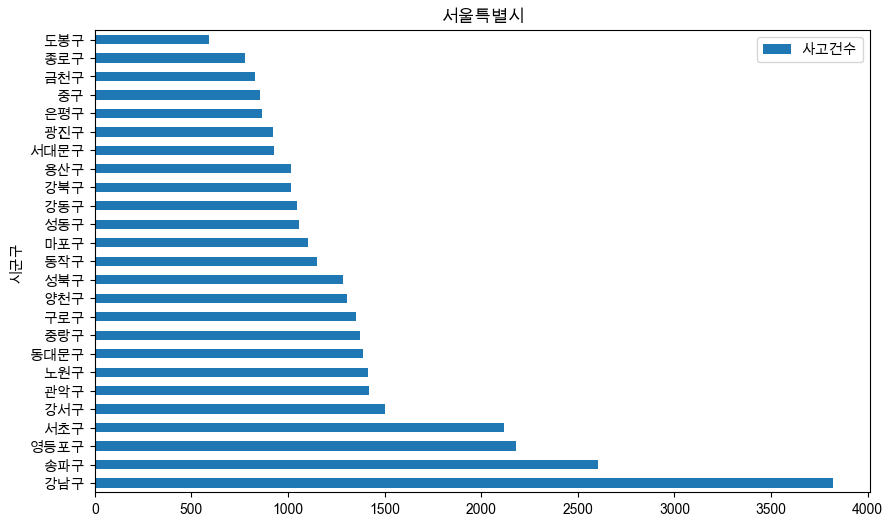

In [14]:
seoul.sort_values('사고건수', ascending=False).plot.barh(figsize=(10, 6))
plt.title('서울특별시')
plt.show()

### 부산광역시

In [15]:
busan = road.loc[road['시도'] == '부산', ['시군구', '사고건수']].groupby('시군구').sum()
print(busan)

      사고건수
시군구       
강서구    783
금정구    871
기장군    511
남구     705
동구     484
동래구    839
부산진구  1662
북구     566
사상구    705
사하구    876
서구     433
수영구    664
연제구    666
영도구    341
중구     265
해운대구   968


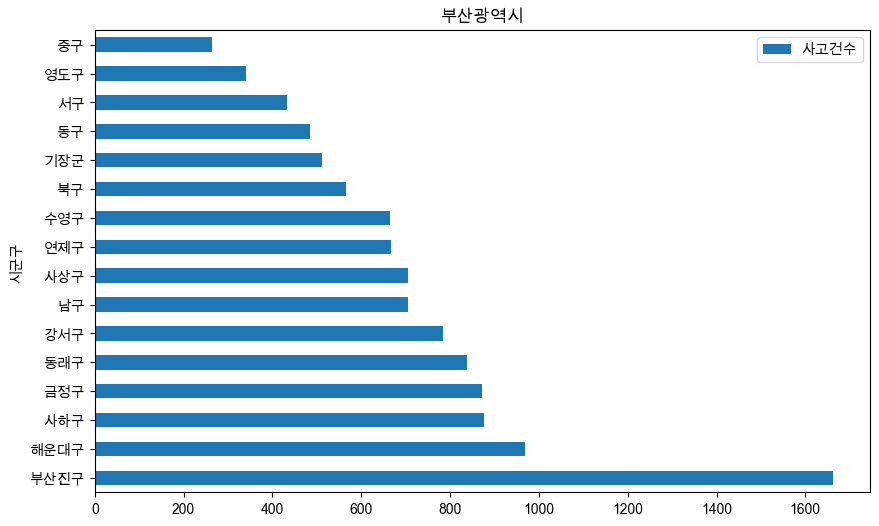

In [16]:
busan.sort_values('사고건수', ascending=False).plot.barh(figsize=(10, 6))
plt.title('부산광역시')
plt.show()

### 경기도

In [17]:
gyeonggido = road.loc[road['시도'] == '경기', ['시군구', '사고건수']].groupby('시군구').sum()
print(gyeonggido)

      사고건수
시군구       
가평군    367
고양시   3532
과천시    168
광명시    992
광주시   2265
구리시    737
군포시    622
김포시   1775
남양주시  2136
동두천시   351
부천시   3436
성남시   3398
수원시   4615
시흥시   2385
안산시   3821
안성시   1072
안양시   1182
양주시    998
양평군    504
여주시    538
연천군    199
오산시   1108
용인시   3603
의왕시    433
의정부시  1690
이천시   1192
파주시   1708
평택시   3321
포천시    914
하남시   1195
화성시   3075


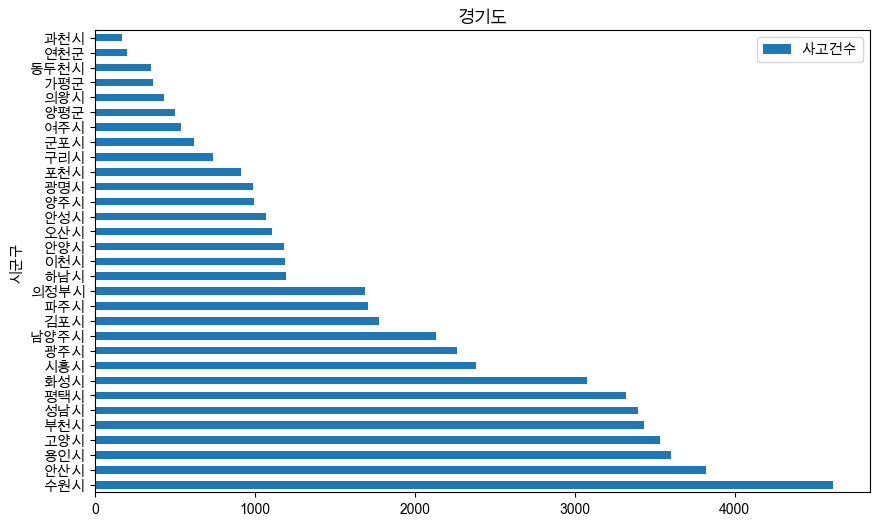

In [18]:
gyeonggido.sort_values('사고건수', ascending=False).plot.barh(figsize=(10, 6))
plt.title('경기도')
plt.show()

### 강원도

In [19]:
gangwon = road.loc[road['시도'] == '강원', ['시군구', '사고건수']].groupby('시군구').sum()
print(gangwon)

     사고건수
시군구      
강릉시   653
고성군   119
동해시   362
삼척시   257
속초시   384
양구군    81
양양군   153
영월군   136
원주시  1718
인제군    88
정선군   167
철원군   125
춘천시  1361
태백시   190
평창군   178
홍천군   329
화천군    96
횡성군   208


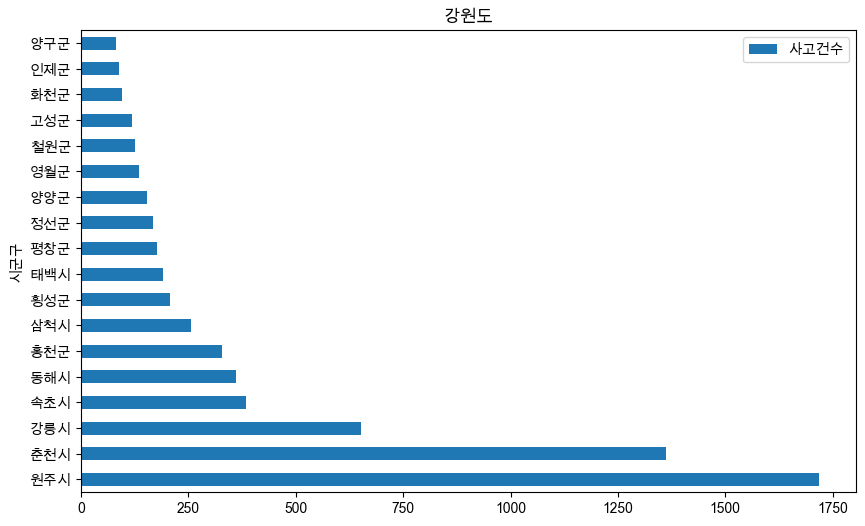

In [20]:
gangwon.sort_values('사고건수', ascending=False).plot.barh(figsize=(10, 6))
plt.title('강원도')
plt.show()

### 충청북도

In [21]:
chungbuk = road.loc[road['시도'] == '충북', ['시군구', '사고건수']].groupby('시군구').sum()
print(chungbuk)

     사고건수
시군구      
괴산군   181
단양군   147
보은군   136
영동군   145
옥천군   153
음성군   528
제천시   706
증평군   210
진천군   491
청주시  4141
충주시  1147


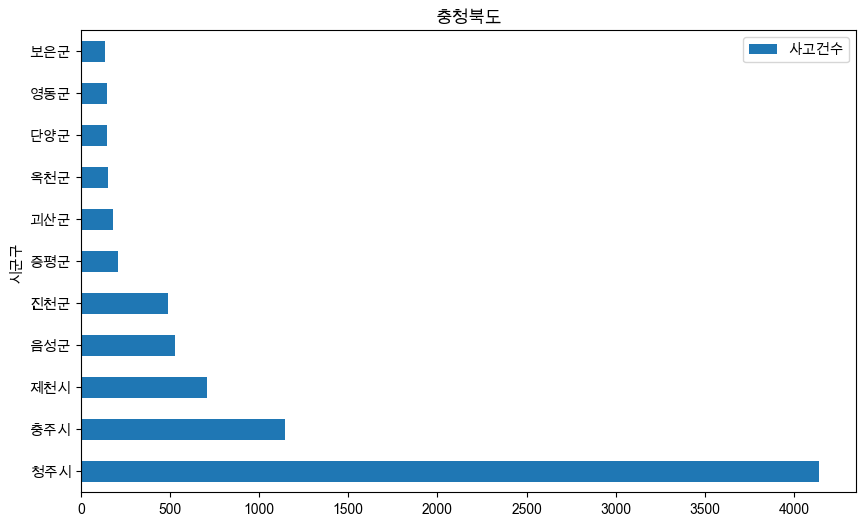

In [22]:
chungbuk.sort_values('사고건수', ascending=False).plot.barh(figsize=(10, 6))
plt.title('충청북도')
plt.show()

### 충청남도

In [23]:
chungnam = road.loc[road['시도'] == '충남', ['시군구', '사고건수']].groupby('시군구').sum()
print(chungbuk)

     사고건수
시군구      
괴산군   181
단양군   147
보은군   136
영동군   145
옥천군   153
음성군   528
제천시   706
증평군   210
진천군   491
청주시  4141
충주시  1147


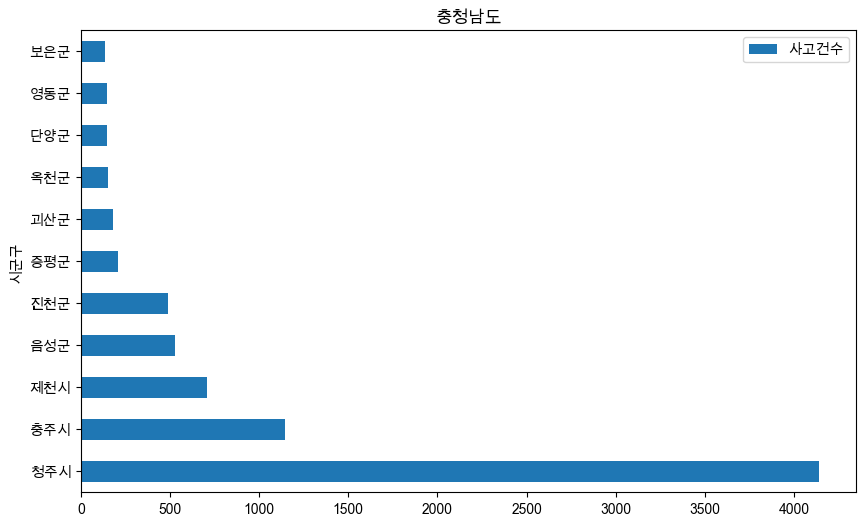

In [24]:
chungbuk.sort_values('사고건수', ascending=False).plot.barh(figsize=(10, 6))
plt.title('충청남도')
plt.show()

### 전라북도

In [25]:
jeonbuk = road.loc[road['시도'] == '전북', ['시군구', '사고건수']].groupby('시군구').sum()
print(jeonbuk)

     사고건수
시군구      
고창군   134
군산시  1100
김제시   263
남원시   291
무주군    87
부안군   200
순창군   110
완주군   194
익산시   987
임실군   119
장수군    34
전주시  2151
정읍시   379
진안군    63


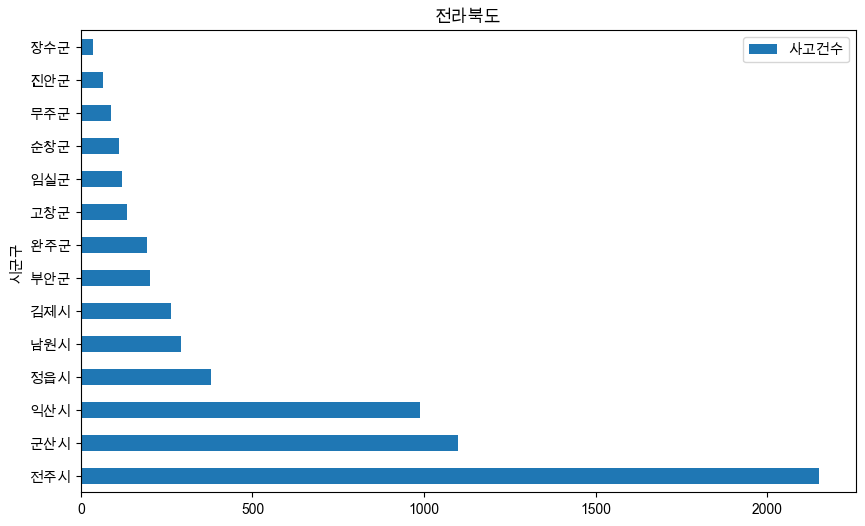

In [26]:
jeonbuk.sort_values('사고건수', ascending=False).plot.barh(figsize=(10, 6))
plt.title('전라북도')
plt.show()

### 전라남도

In [27]:
jeonnam = road.loc[road['시도'] == '전남', ['시군구', '사고건수']].groupby('시군구').sum()
print(jeonnam)

     사고건수
시군구      
강진군   289
고흥군   275
곡성군   110
광양시   575
구례군   117
나주시   447
담양군   292
목포시  1385
무안군   462
보성군   180
순천시  1152
신안군   105
여수시  1357
영광군   155
영암군   323
완도군   163
장성군   195
장흥군   234
진도군    93
함평군   182
해남군   285
화순군   309


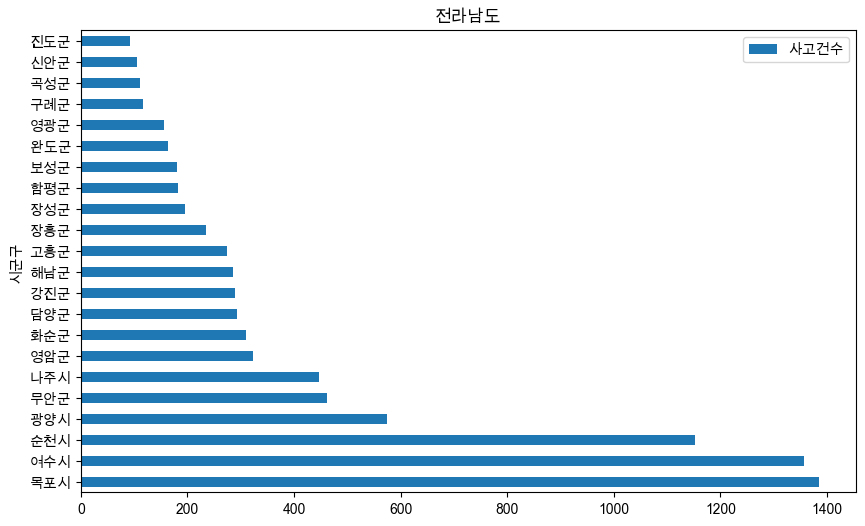

In [28]:
jeonnam.sort_values('사고건수', ascending=False).plot.barh(figsize=(10, 6))
plt.title('전라남도')
plt.show()

### 경상남도

In [29]:
gueongnam = road.loc[road['시도'] == '경남', ['시군구', '사고건수']].groupby('시군구').sum()
print(gueongnam)

         사고건수
시군구          
거제시       808
거창군       274
고성군       209
김해시      1991
남해군       194
밀양시       478
사천시       597
산청군       180
양산시      1318
의령군       142
진주시       702
창녕군       263
창원시(통합)  2556
통영시       637
하동군       102
함안군       282
함양군       174
합천군       152


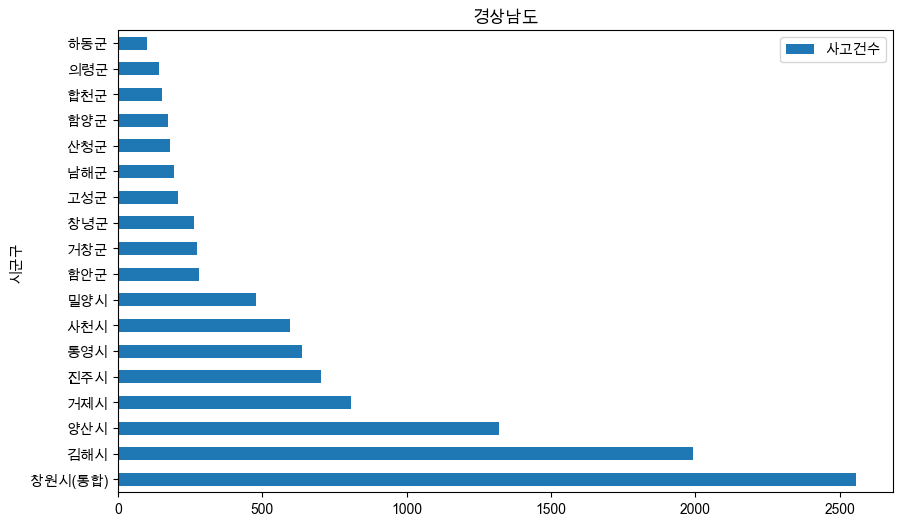

In [30]:
gueongnam.sort_values('사고건수', ascending=False).plot.barh(figsize=(10, 6))
plt.title('경상남도')
plt.show()

### 제주특별자치도

In [31]:
jeju = road.loc[road['시도'] == '제주', ['시군구', '사고건수']].groupby('시군구').sum()
print(jeju)

      사고건수
시군구       
서귀포시  1311
제주시   3062


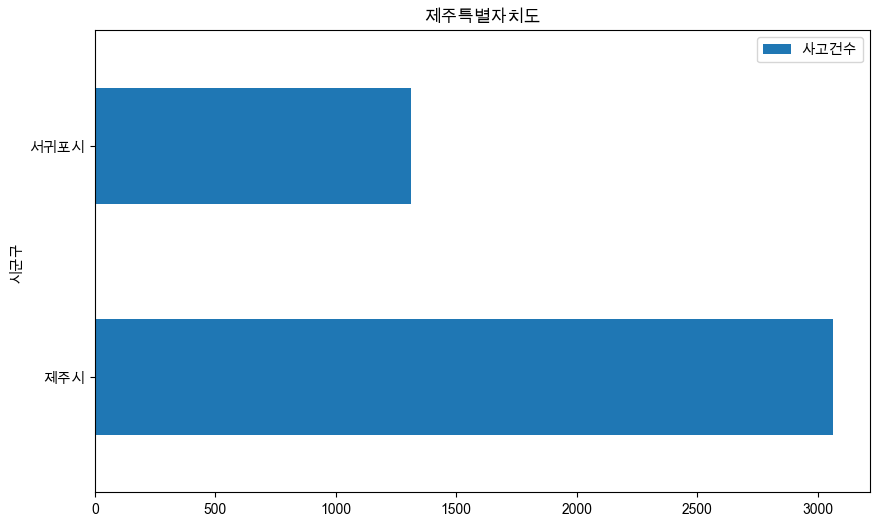

In [32]:
jeju.sort_values('사고건수', ascending=False).plot.barh(figsize=(10, 6))
plt.title('제주특별자치도')
plt.show()

### 대구광역시

In [33]:
daegu = road.loc[road['시도'] == '대구', ['시군구', '사고건수']].groupby('시군구').sum()
print(daegu)

     사고건수
시군구      
남구    765
달서구  2991
달성군   856
동구   1656
북구   2100
서구   1008
수성구  2136
중구    621


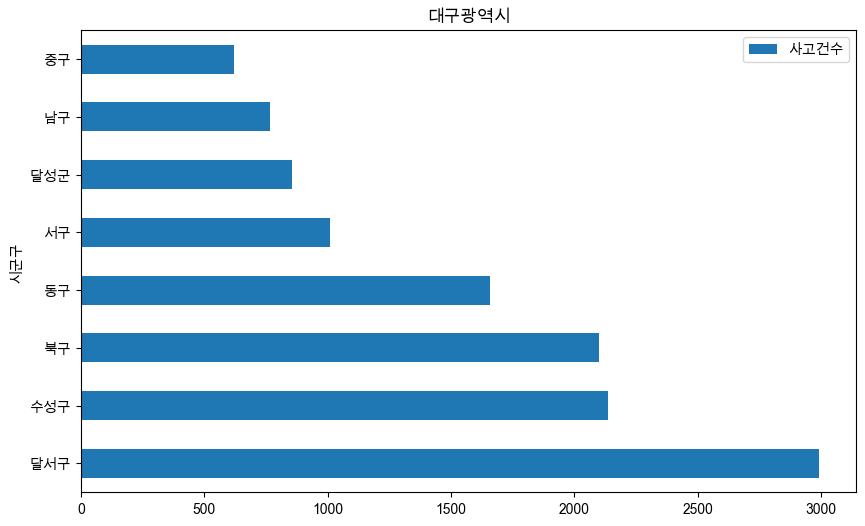

In [34]:
daegu.sort_values('사고건수', ascending=False).plot.barh(figsize=(10, 6))
plt.title('대구광역시')
plt.show()

### 인천광역시

In [35]:
incheon = road.loc[road['시도'] == '인천', ['시군구', '사고건수']].groupby('시군구').sum()
print(incheon)

      사고건수
시군구       
강화군    198
계양구    749
남동구   1542
동구     107
미추홀구  1150
부평구   1472
서구    1688
연수구    542
옹진군     33
중구     431


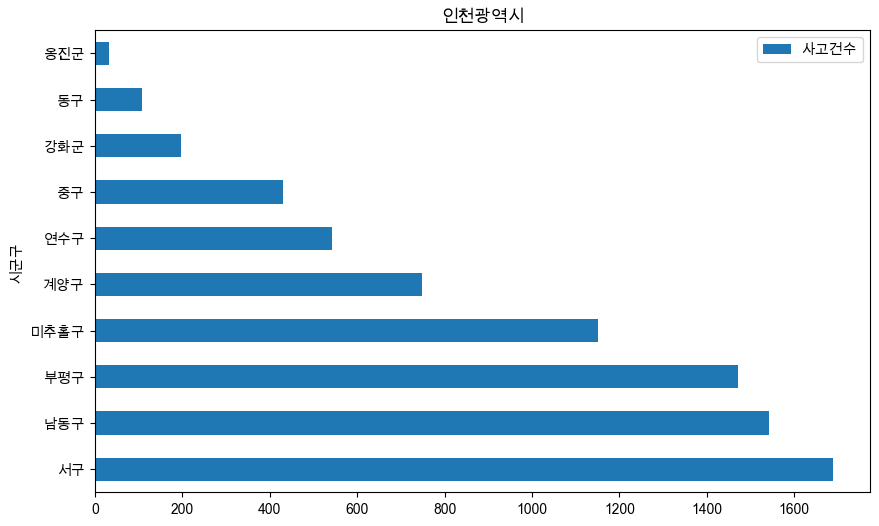

In [36]:
incheon.sort_values('사고건수', ascending=False).plot.barh(figsize=(10, 6))
plt.title('인천광역시')
plt.show()

### 광주광역시

In [37]:
gwangju = road.loc[road['시도'] == '광주', ['시군구', '사고건수']].groupby('시군구').sum()
print(gwangju)

     사고건수
시군구      
광산구  2204
남구    754
동구    591
북구   2165
서구   1829


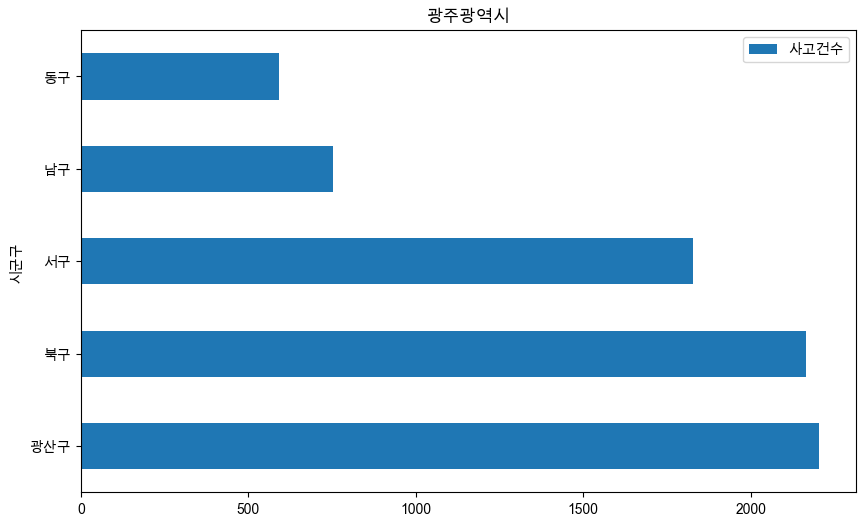

In [38]:
gwangju.sort_values('사고건수', ascending=False).plot.barh(figsize=(10, 6))
plt.title('광주광역시')
plt.show()

### 대전광역시

In [39]:
daejeon = road.loc[road['시도'] == '대전', ['시군구', '사고건수']].groupby('시군구').sum()
print(daejeon)

     사고건수
시군구      
대덕구   862
동구   1046
서구   2162
유성구  1905
중구   1052


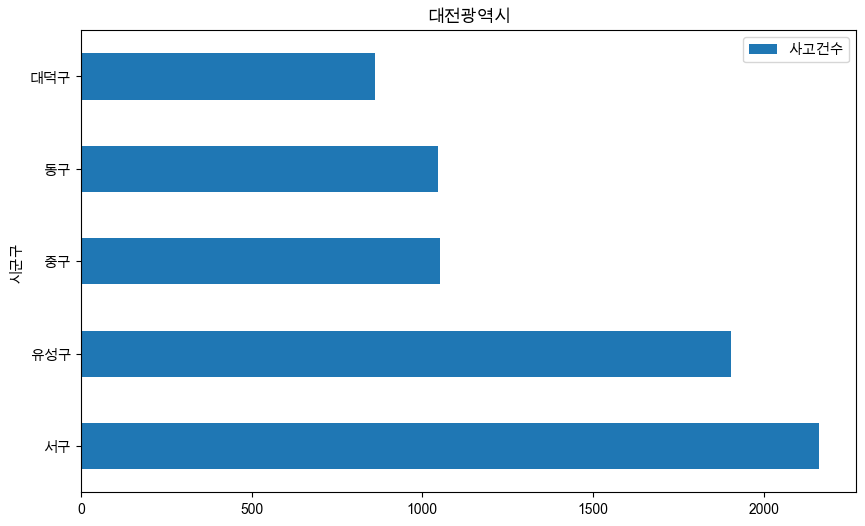

In [40]:
daejeon.sort_values('사고건수', ascending=False).plot.barh(figsize=(10, 6))
plt.title('대전광역시')
plt.show()

### 울산광역시

In [41]:
ulsan = road.loc[road['시도'] == '울산', ['시군구', '사고건수']].groupby('시군구').sum()
print(ulsan)

     사고건수
시군구      
남구   1193
동구    467
북구    786
울주군   731
중구    624


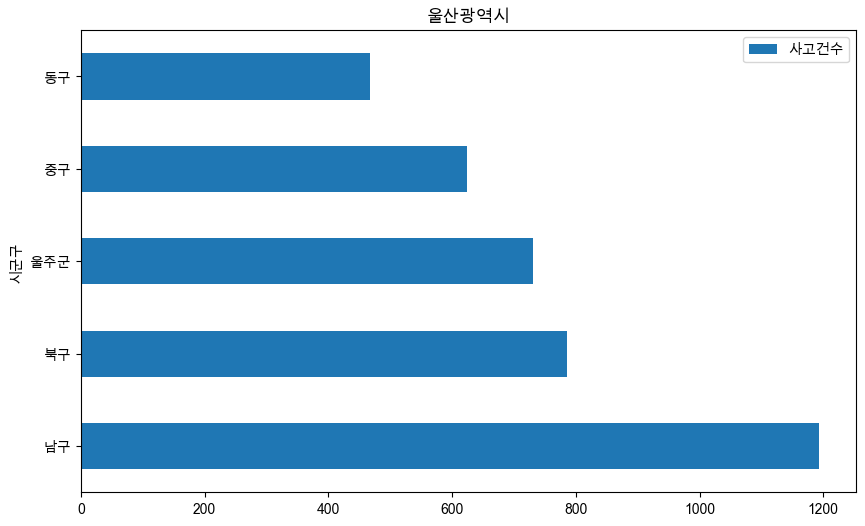

In [42]:
ulsan.sort_values('사고건수', ascending=False).plot.barh(figsize=(10, 6))
plt.title('울산광역시')
plt.show()

### 세종특별자치시

In [43]:
sejong = road.loc[road['시도'] == '세종', ['시군구', '사고건수']].groupby('시군구').sum()
print(sejong)

     사고건수
시군구      
세종시   788


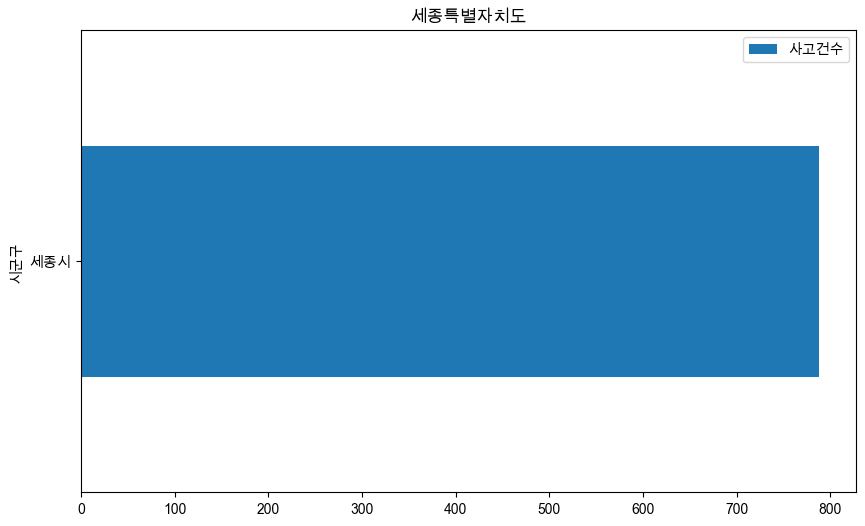

In [44]:
sejong.sort_values('사고건수', ascending=False).plot.barh(figsize=(10, 6))
plt.title('세종특별자치도')
plt.show()

### 각 시도별 교통사고 분석

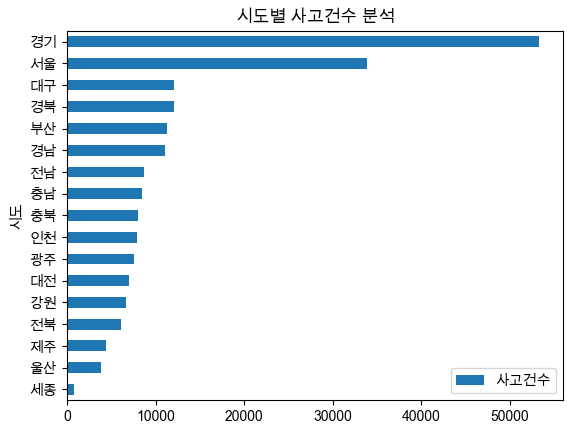

In [45]:
sido = road[['시도' ,'사고건수']].groupby('시도').sum().sort_values('사고건수').plot.barh()
plt.title('시도별 사고건수 분석')
plt.show()

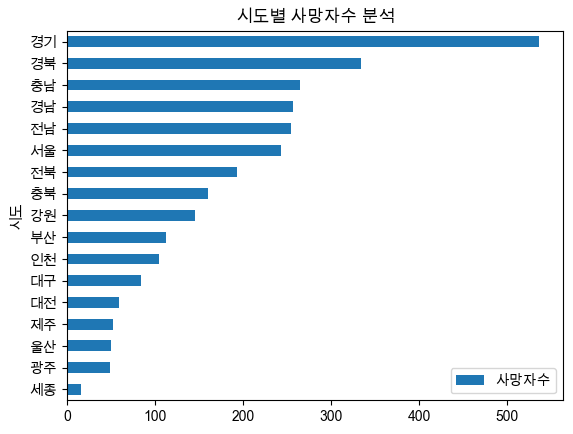

In [46]:
sido = road[['시도' ,'사망자수']].groupby('시도').sum().sort_values('사망자수').plot.barh()
plt.title('시도별 사망자수 분석')
plt.show()

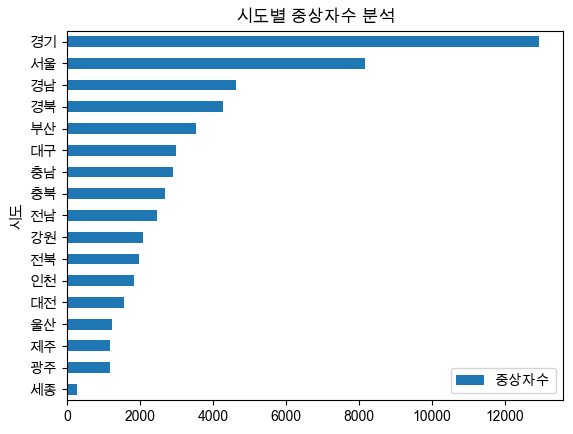

In [47]:
sido = road[['시도' ,'중상자수']].groupby('시도').sum().sort_values('중상자수').plot.barh()
plt.title('시도별 중상자수 분석')
plt.show()

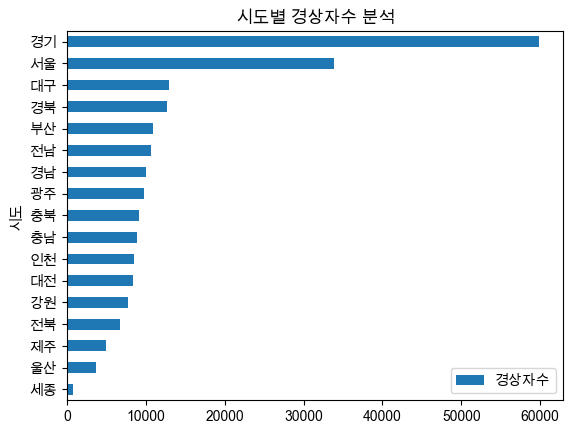

In [48]:
sido = road[['시도' ,'경상자수']].groupby('시도').sum().sort_values('경상자수').plot.barh()
plt.title('시도별 경상자수 분석')
plt.show()

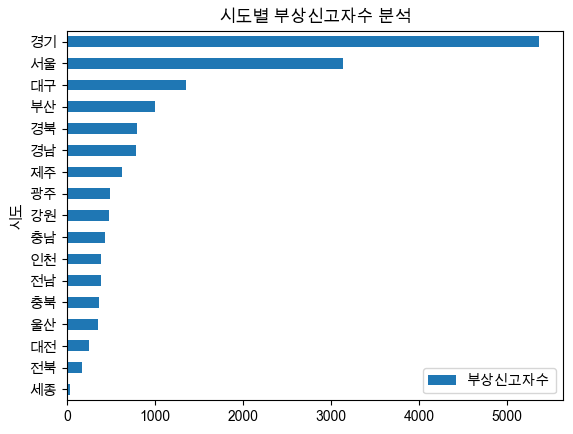

In [49]:
sido = road[['시도' ,'부상신고자수']].groupby('시도').sum().sort_values('부상신고자수').plot.barh()
plt.title('시도별 부상신고자수 분석')
plt.show()

In [50]:
month = int(input('교통사고 건수를 확인할 월을 입력하세요 >> '))
city, cuntry = input('교통사고 건수를 확인하고 싶은 시도 시군구를 입력해주세요 >> ').split()

result = road[(road['발생월']==month) & (road['시도']==city) & (road['시군구']==cuntry)]['사고건수'].values[0]

print(month,'월', city, cuntry,'의', '교통사고 건수는', result, '건 입니다.')

11 월 서울 은평구 의 교통사고 건수는 67 건 입니다.


### 경기도 월별 교통사고 분석

In [51]:
gyeonggido_monthly = road.loc[road['시도'] == '경기', ['발생월', '사고건수']].groupby('발생월').sum()
print(gyeonggido_monthly)

     사고건수
발생월      
1    3890
2    3819
3    4282
4    4444
5    4485
6    4555
7    4638
8    4285
9    4531
10   4855
11   4819
12   4729


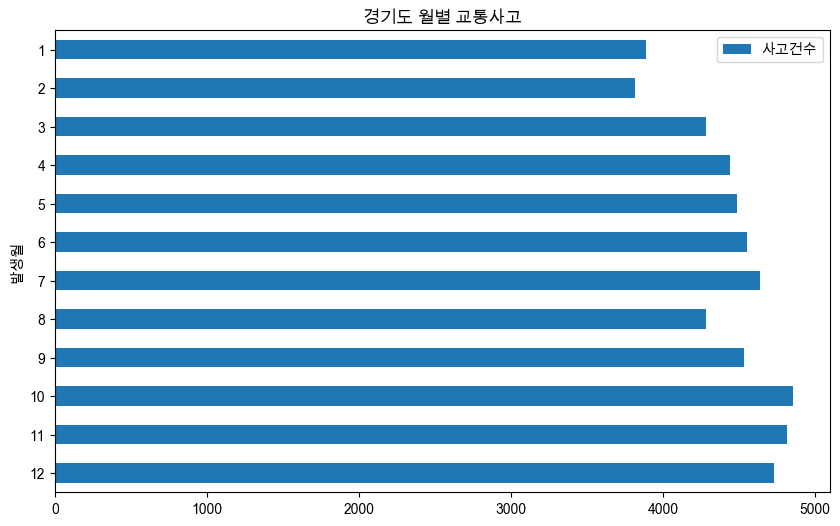

In [52]:
gyeonggido_monthly.sort_values('발생월', ascending=False).plot.barh(figsize=(10, 6))
plt.title('경기도 월별 교통사고')
plt.show()

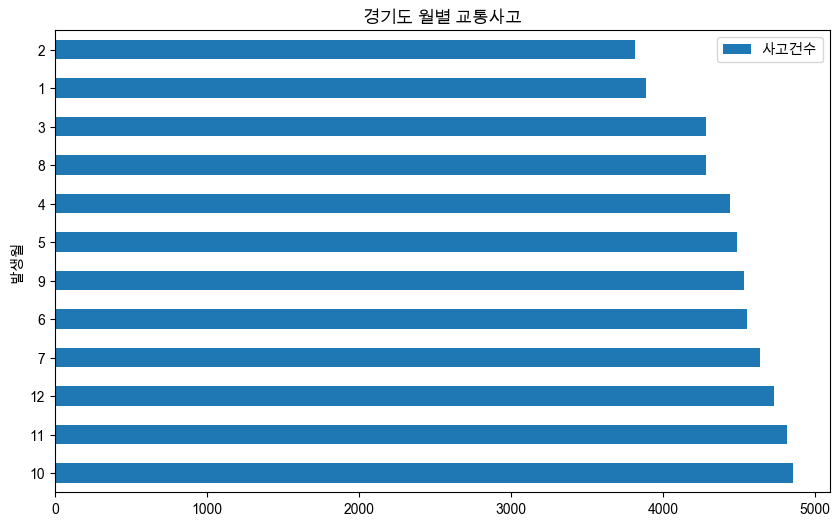

In [53]:
gyeonggido_monthly.sort_values('사고건수', ascending=False).plot.barh(figsize=(10, 6))
plt.title('경기도 월별 교통사고')
plt.show()

### 시간대별 교통사고

In [54]:
time = pd.read_csv('/Users/kimsanghun/Documents/프로젝트/data/도로교통공단_시간대별 교통사고 통계_20211231.csv', encoding='cp949')
time

,시간대,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,00시-02시,5968.0,181.0,1795.0,6398.0,557.0
1,02시-04시,2801.0,135.0,906.0,2781.0,312.0
2,04시-06시,3762.0,183.0,1369.0,3402.0,324.0
3,06시-08시,10725.0,252.0,3296.0,10570.0,788.0
4,08시-10시,19654.0,257.0,5216.0,21008.0,1414.0
5,10시-12시,20729.0,286.0,5832.0,22224.0,1608.0
6,12시-14시,23422.0,283.0,6740.0,25553.0,1941.0
7,14시-16시,24640.0,280.0,6813.0,27632.0,2044.0
8,16시-18시,27502.0,248.0,6995.0,30615.0,2330.0
9,18시-20시,29483.0,304.0,7626.0,31476.0,2360.0


In [55]:
time.sort_values('사고건수', ascending=False)

,시간대,사고건수,사망자수,중상자수,경상자수,부상신고자수
9,18시-20시,29483.0,304.0,7626.0,31476.0,2360.0
8,16시-18시,27502.0,248.0,6995.0,30615.0,2330.0
7,14시-16시,24640.0,280.0,6813.0,27632.0,2044.0
6,12시-14시,23422.0,283.0,6740.0,25553.0,1941.0
5,10시-12시,20729.0,286.0,5832.0,22224.0,1608.0
10,20시-22시,20164.0,268.0,5453.0,21691.0,1545.0
4,08시-10시,19654.0,257.0,5216.0,21008.0,1414.0
11,22시-24시,14280.0,239.0,3864.0,15933.0,1197.0
3,06시-08시,10725.0,252.0,3296.0,10570.0,788.0
0,00시-02시,5968.0,181.0,1795.0,6398.0,557.0


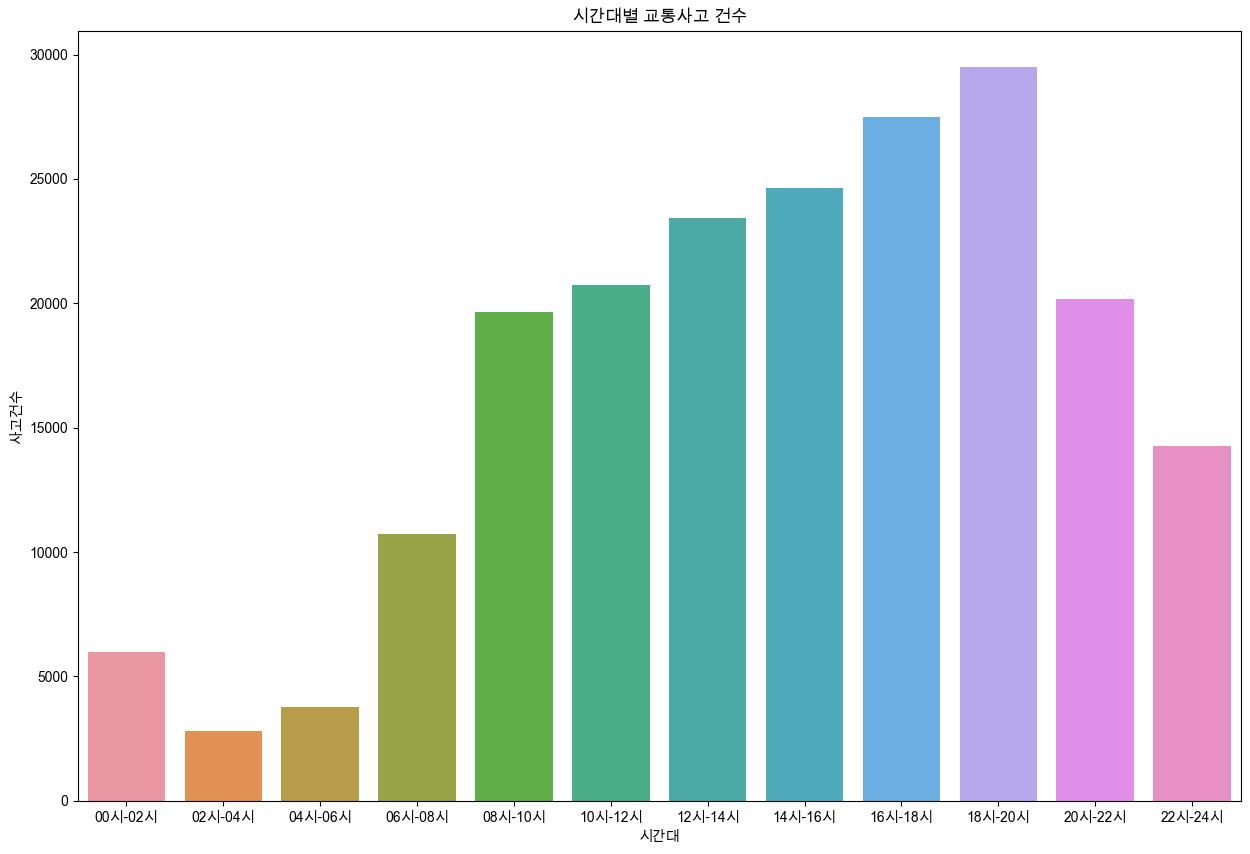

In [56]:
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.barplot(data = time, x='시간대', y='사고건수')
plt.title('시간대별 교통사고 건수')
plt.show()

### 연도별 교통사고

In [76]:
year = pd.read_csv('/Users/kimsanghun/Documents/프로젝트/data/한국도로공사_교통사고통계_20211231.csv', encoding='cp949')
year.set_index('연도', inplace=True)
year

,사고,사망,부상
연도,,,
2000,3910,569,2845
2001,3638,456,2331
2002,3957,421,2115
2003,3585,348,1843
2004,3242,300,1555
2005,2880,249,1170
2006,2583,284,1131
2007,2550,283,1114
2008,2449,265,955


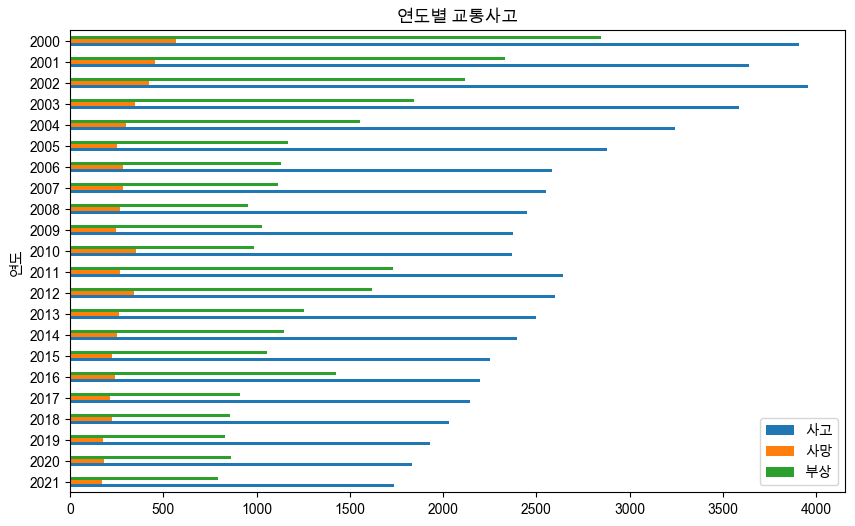

In [77]:
year.sort_index(ascending=False).plot.barh(figsize=(10, 6))
plt.title('연도별 교통사고')
plt.show()

### 머신러닝

In [59]:
crash_data = road[['발생월', '사망자수', '중상자수', '경상자수', '부상신고자수']].to_numpy()
crash_target = road['사고건수'].to_numpy()

In [60]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    crash_data, crash_target, random_state=42
)

In [61]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9907442633692959
0.9863057919221094


In [62]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9889272273749691
0.9880586177112362


In [63]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_input, train_target)
print(ridge.score(train_input, train_target))
print(ridge.score(test_input, test_target))

0.9889272273738411
0.9880585876967957


In [64]:
# 릿지 회귀 모델 훈련
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_input, train_target)
    train_score.append(ridge.score(train_input, train_target))
    test_score.append(ridge.score(test_input, test_target))

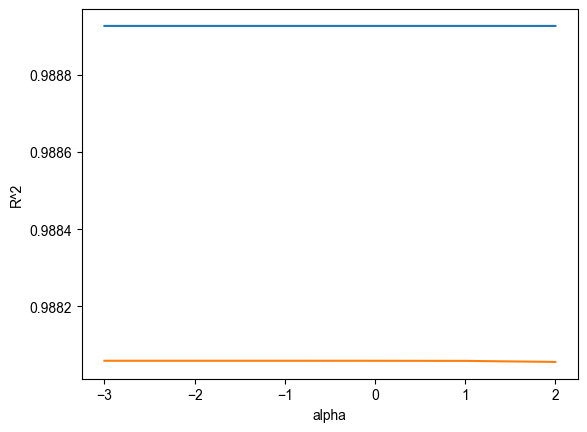

In [65]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [66]:
# 릿지 회귀 최종 모델 훈련
ridge = Ridge(alpha=0.1)
ridge.fit(train_input, train_target)
print('train data socre:', ridge.score(train_input, train_target))
print('test data score:', ridge.score(test_input, test_target))

train data socre: 0.9889272273749578
test data score: 0.9880586147097491


In [67]:
# 라쏘 회귀 훈련
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_input, train_target)
print('train data score:', lasso.score(train_input, train_target))
print('test data score:', lasso.score(test_input, test_target))

train data score: 0.9889063062645629
test data score: 0.987921744575757


In [68]:
# 규제 강도 조절
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(train_input, train_target)
    train_score.append(lasso.score(train_input, train_target))
    test_score.append(lasso.score(test_input, test_target))

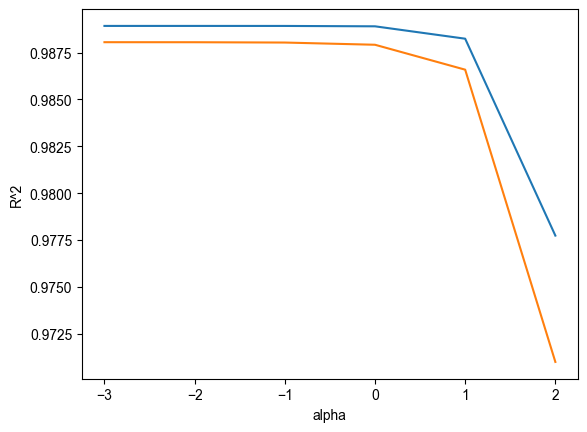

In [69]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [70]:
# 라쏘 회귀 모델 최종 모델 훈련
lasso = Lasso(alpha=0.1)
lasso.fit(train_input, train_target)
print('train data socre:', lasso.score(train_input, train_target))
print('test data score:', lasso.score(test_input, test_target))

train data socre: 0.9889262314166064
test data score: 0.9880398327828351


In [71]:
month = int(input('교통사고 건수를 예측할 월을 입력해주세요 >> '))
city, cuntry = input('교통사고 건수를 예측하고 싶은 시도 시군구를 입력해주세요 >> ').split()
result = ridge.predict(road.loc[(road['발생월'] == month) & (road['시도'] == city) & (road['시군구'] == cuntry), ['발생월', '사망자수', '중상자수', '경상자수', '부상신고자수']].to_numpy())[0]
print(f'2023년 {month}월 {city} {cuntry}의 교통사고 건수는 약{int(result)}건으로 예상합니다.')

2023년 11월 서울 은평구의 교통사고 건수는 약61건으로 예상합니다.
